### Measuring Max Drawdown

The maximum drawdown it is the maximum loss that you could have experienced, 
if you had been unlucky enough to buy the asset or the strategy or whatever you're looking at. 
At its very **peak**, and you sold it at the very **bottom**. 

1. Computing drowdowns is to construct a **wealth index** hypotetical bue-and-hold investnment in the asset.
2. Look at the prior peak at any point in time.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
data_path = Path().cwd().parents[1].joinpath('data')

me_m = pd.read_csv(
    data_path.joinpath('Portfolios_Formed_on_ME_monthly_EW.csv'),
    header=0, index_col=0,
    parse_dates=True, na_values=-99.99,
)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [2]:
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets / 100
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

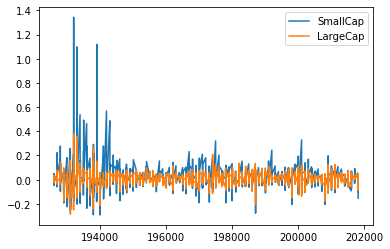

In [3]:
rets.plot.line()

In [4]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [5]:
# Treat index as periods
rets.index = rets.index.to_period('M')

In [6]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [7]:
# So now we can do stuff like that
rets['1929']

,SmallCap,LargeCap
1929-01,0.0636,0.0493
1929-02,0.0119,-0.0015
1929-03,-0.0414,0.0032
1929-04,0.0503,0.0172
1929-05,-0.1189,-0.0343
1929-06,0.0414,0.0906
1929-07,-0.0199,0.0455
1929-08,-0.0229,0.0980
1929-09,-0.0522,-0.0508
1929-10,-0.1921,-0.1775


In [8]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

# Compute drowdowns
1. Compute a welth index
2. Compute previus peaks
3. Compute drawdawn - which is whe welth value as percentage of the privius peak.

#### The wealth index is the value of a portfolio as it compounds over time.

In [9]:
wealth_index = 1000 * (1 + rets['LargeCap']).cumprod() # 1000 is 1000$
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<AxesSubplot:>

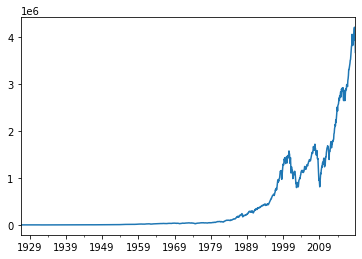

In [10]:
wealth_index.plot.line()

#### Previous peaks, is what? 
You want to go over time, but you want to keep track of the cumulative max.
What is the max that you have seen at any given point in time? 
So that is also available just by calling a method, and that is called cummax.

<AxesSubplot:>

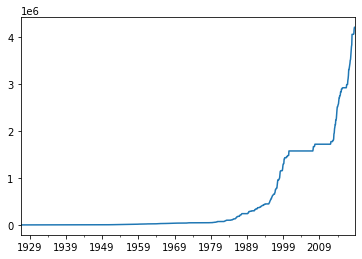

In [11]:
previus_peaks = wealth_index.cummax()
previus_peaks.plot.line()

<AxesSubplot:>

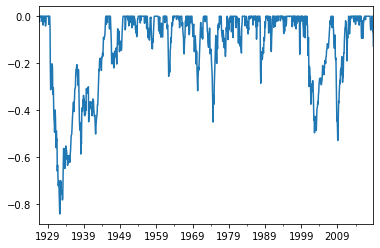

In [12]:
drawdawn = (wealth_index - previus_peaks) / previus_peaks
drawdawn.plot.line()

In [13]:
drawdawn.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [14]:
drawdawn.min()

-0.8400375277943123

In [15]:
# Mdd sinse 1975
drawdawn['1975':].min()

-0.5280945042309304

In [16]:
# but when?
drawdawn['1975':].idxmin()

Period('2009-02', 'M')

In [17]:
drawdawn.idxmin()

Period('1932-05', 'M')

In [18]:
def drawdown(return_seies: pd.Series):
    """Takes time series of asset returns.
    
    Computes and returns df that contains:
    * the wealth index
    * whe previus peaks
    * percent drawdown
    """
    wealth_index = 1000 * (1 + return_seies).cumprod()
    previus_peaks = wealth_index.cummax()
    drawdawns = (wealth_index - previus_peaks) / previus_peaks
    return pd.DataFrame({
        'WealthIndex': wealth_index,
        'PreviusPeaks': previus_peaks,
        'Drawdawns': drawdawns,
    })


In [19]:
sm_mdd = drawdown(rets['SmallCap'])
sm_mdd.head()

,WealthIndex,PreviusPeaks,Drawdawns
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


<AxesSubplot:>

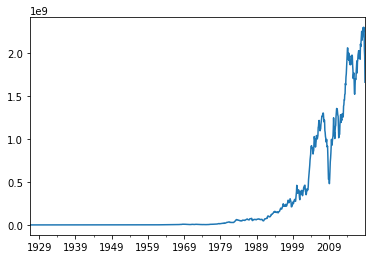

In [20]:
sm_mdd['WealthIndex'].plot.line()

<AxesSubplot:>

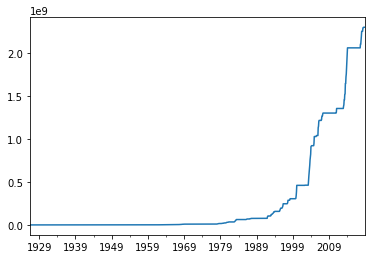

In [21]:
sm_mdd['PreviusPeaks'].plot.line()

<AxesSubplot:>

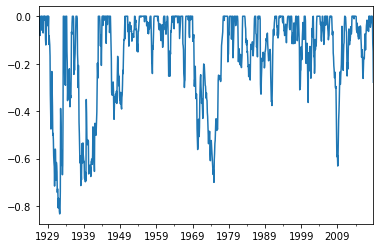

In [22]:
sm_mdd['Drawdawns'].plot.line()

<AxesSubplot:>

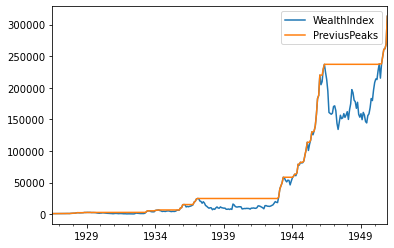

In [26]:
sm_mdd[['WealthIndex', 'PreviusPeaks']].plot.line()

<AxesSubplot:>

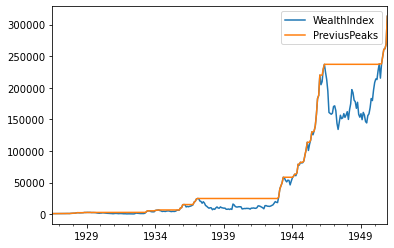

In [28]:
# Can get slice
sm_mdd[:'1950'][['WealthIndex', 'PreviusPeaks']].plot.line()

In [36]:
# Compare biggest crash for SmallCap and LargeCap
drawdown(rets['SmallCap'])['Drawdawns'].min()

-0.8330007793945303

In [37]:
drawdown(rets['SmallCap'])['Drawdawns'].idxmin()

Period('1932-05', 'M')

In [38]:
drawdown(rets['LargeCap'])['Drawdawns'].min()

-0.8400375277943123

In [39]:
drawdown(rets['LargeCap'])['Drawdawns'].idxmin()

Period('1932-05', 'M')

In [41]:
drawdown(rets['1940':]['SmallCap'])['Drawdawns'].min()

-0.7000596091967917

In [42]:
drawdown(rets['1940':]['SmallCap'])['Drawdawns'].idxmin()

Period('1974-12', 'M')

In [44]:
drawdown(rets['1975':]['SmallCap'])['Drawdawns'].min()

-0.6312068077252386

In [45]:
drawdown(rets['1975':]['SmallCap'])['Drawdawns'].idxmin()

Period('2009-02', 'M')